In [92]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from tqdm.notebook import trange, tqdm
tqdm.pandas()

In [95]:
metrics = pd.read_excel('../data/working_dir/gpt/temperature_metrics.xlsx', )
metrics['temps'] = metrics['temps'].apply(lambda el: f"${el}$")
metrics.columns = pd.Series(metrics.columns).apply(lambda el: f"${el}$")
metrics.iloc[:, 1:] = metrics.iloc[:, 1:].round(2)

metrics

,$temps$,$mean\_F_1$,$Accuracy$,$BertScore\_F_1$,$chrF++$,$Jaccard\_measure$
0,$T=0.00$,0.71,0.73,0.75,49.22,0.31
1,$T=0.05$,0.65,0.68,0.76,51.03,0.32
2,$T=0.10$,0.70,0.72,0.75,48.92,0.30
3,$T=0.15$,0.66,0.68,0.75,47.34,0.30
4,$T=0.20$,0.66,0.69,0.76,50.27,0.32
5,$T=0.25$,0.72,0.74,0.75,50.43,0.31
6,$T=0.30$,0.68,0.71,0.75,46.38,0.29
7,$T=0.35$,0.72,0.74,0.75,50.84,0.32
8,$T=0.40$,0.71,0.73,0.75,49.62,0.31
9,$T=0.45$,0.71,0.73,0.75,49.37,0.31


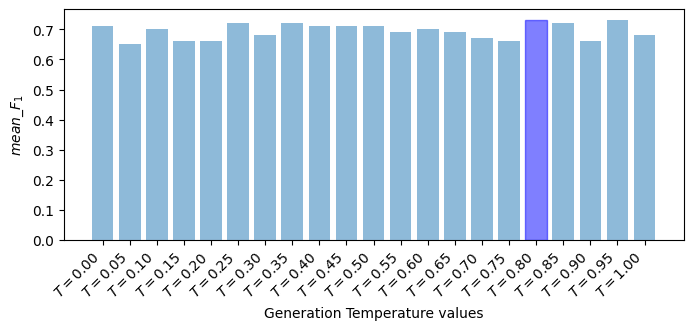

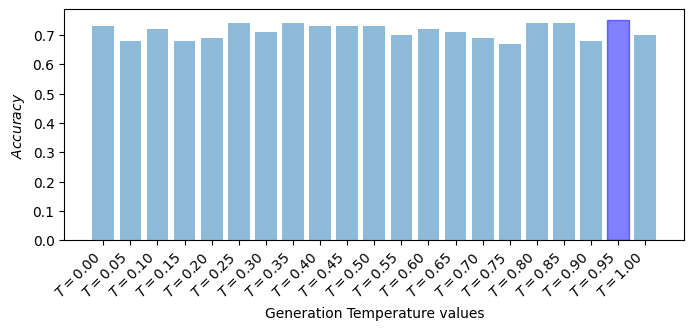

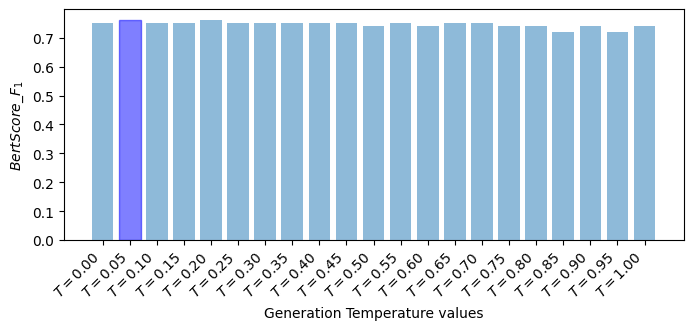

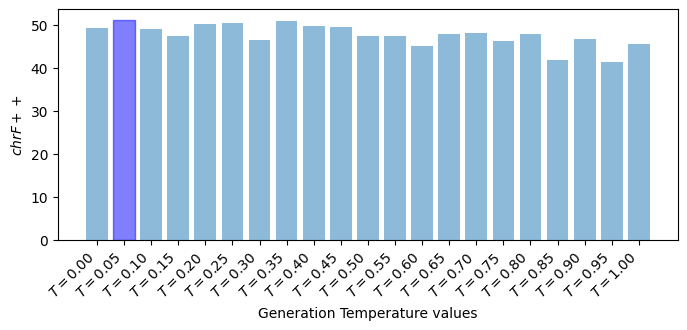

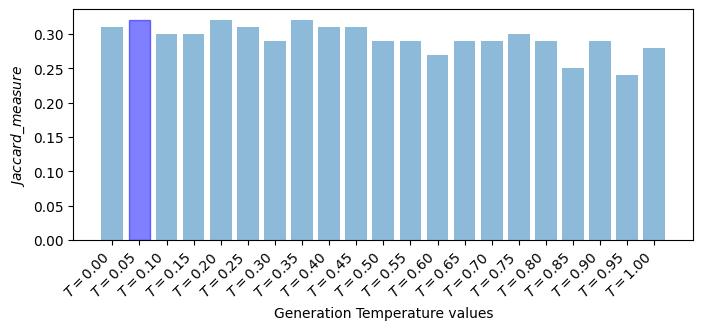

In [101]:
for metric in metrics.columns[1:]:
    plt.figure(figsize=(8, 3))
    ax = plt.bar(x=metrics['$temps$'], height=metrics[metric], alpha=0.5)
    ax.patches[metrics[metric].argmax()].set_color('blue')
    
    plt.xlabel('Generation Temperature values')
    plt.ylabel(metric)
    plt.xticks(rotation=45, horizontalalignment="right")
    metric = metric[1:-1].replace('\\', '')
    plt.savefig(f'../data/temp_metrics_{metric}.png', bbox_inches='tight', dpi=400)
    plt.show()
